# Task # 2: House Pricing Prediction

### Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Data Preprocessing and Cleaning

In [ ]:
# reading the csv file and then printing the first 5 elements using head()
df = pd.read_csv('Housing.csv', header=0)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Checking for missing values in the data, and there are none in this case
missing_values = df.isnull().sum()
print("Missing values in each column is:\n", missing_values)

Missing values in each column is:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
# checking for duplicate values, if there are any
df.duplicated().sum()

0

### Data Visualization using Scatter plot, Bar Chart, Pie Chart

<Axes: xlabel='area', ylabel='price'>

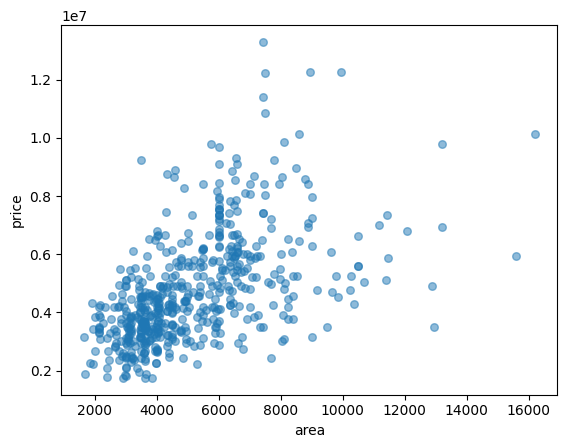

In [ ]:
# plotting a scatter plot to check the relation between area and price, size is kept 30 and the opactiy (alpha) is set to 0.5
df.plot(kind='scatter', x='area', y='price', s=30, alpha=0.5)

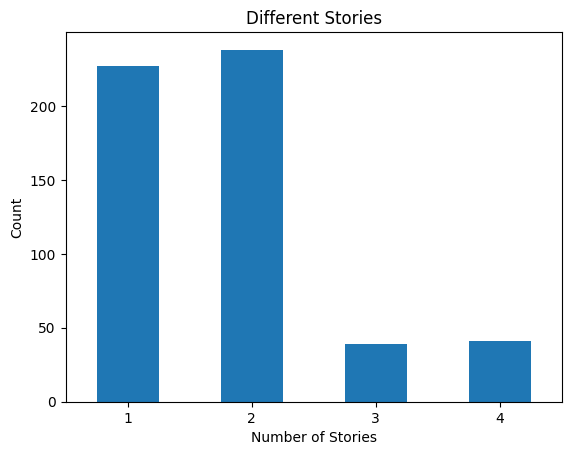

In [ ]:
# picking the 'stories' column from the dataset and visualizing using bar chart
stories = df['stories'].value_counts().sort_index()
stories.plot(kind='bar')
plt.xlabel('Number of Stories')
plt.ylabel('Count')
plt.title('Different Stories')
plt.xticks(rotation=0) # to rotate the annotation of x-axis
plt.show()

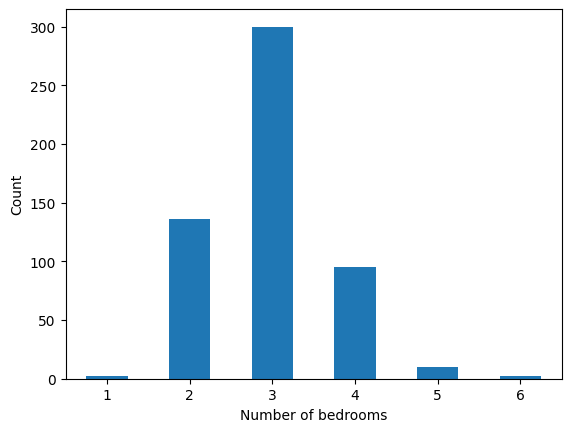

In [ ]:
# picking the 'bedrooms' column from the dataset and visualizing using bar chart
bedroom = df['bedrooms'].value_counts().sort_index()
bedroom.plot(kind='bar')
plt.xlabel('Number of bedrooms')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

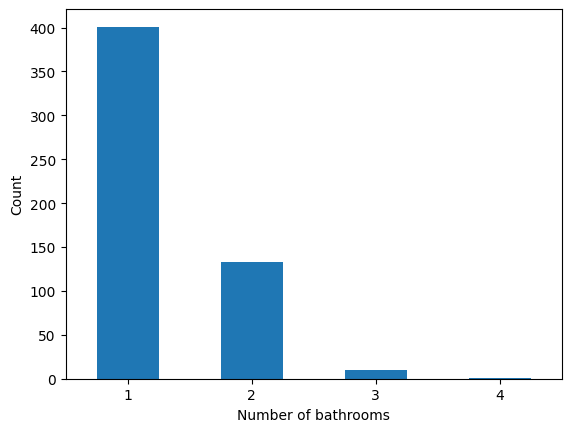

In [ ]:
# picking the 'bathrooms' column from the dataset and visualizing using bar chart
bathrooms = df['bathrooms'].value_counts().sort_index()
bathrooms.plot(kind='bar')
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


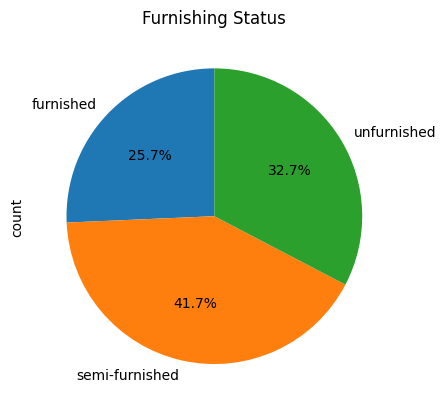

In [ ]:
# picking the 'furnishingstatus' column from the dataset and visualizing using pie chart due to the nature of the column (non-numeric)
furnishing_status = df['furnishingstatus'].value_counts().sort_index()
furnishing_status.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Furnishing Status')
plt.show()

### Feature Engineering and Encoding

In [ ]:
encoder = LabelEncoder()

In [ ]:
encode = ['furnishingstatus', 'mainroad', 'guestroom', 'basement','prefarea','hotwaterheating', 'airconditioning']

for col in encode:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [ ]:
x = df.drop('price', axis=1)
y = df['price']

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y.values.reshape(-1, 1))

In [ ]:
x

array([[0.39656357, 0.6       , 0.33333333, ..., 0.66666667, 1.        ,
        0.        ],
       [0.5024055 , 0.6       , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.57113402, 0.4       , 0.33333333, ..., 0.66666667, 1.        ,
        0.5       ],
       ...,
       [0.13539519, 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.08659794, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15120275, 0.4       , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
y

### Model Selection And Training

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Choosing 'linear regression model' for training the data
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_prediction = linear_model.predict(x_test)

In [ ]:
accuracy = r2_score(y_test, y_prediction)
print("Accuracy of the model is:", accuracy)

Accuracy of the model is: 0.6494754192267794


Visualization of the predicted and actual house prices

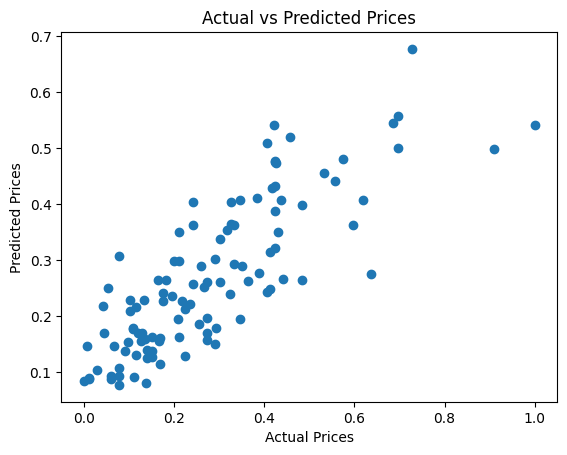

In [ ]:
plt.scatter(y_test, y_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()